In [1]:
from __future__ import division, print_function

import numpy as np

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
po2s = np.array([1, 2, 4, 8, 10, 10, 10, 12, 13, 14, 14, 14, 14, 15, 16, 16, 16, 17, 18, 18, 18, 20])
szs = 2**po2s

In [4]:
times = []
for po2, sz in zip(po2s, szs):
    print('Power of 2:', po2, 'total size:', sz)
    arr = np.random.randn(sz)
    res = %timeit -o np.fft.fft(arr)
    times.append(res.best)

Power of 2: 1 total size: 2
The slowest run took 22.33 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.9 µs per loop
Power of 2: 2 total size: 4
The slowest run took 7.94 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.9 µs per loop
Power of 2: 4 total size: 16
The slowest run took 7.56 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.97 µs per loop
Power of 2: 8 total size: 256
The slowest run took 5.08 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 6.71 µs per loop
Power of 2: 10 total size: 1024
100000 loops, best of 3: 18.1 µs per loop
Power of 2: 10 total size: 1024
100000 loops, best of 3: 18.1 µs per loop
Power of 2: 10 total size: 1024
100000 loops, best of 3: 18.3 µs per loop
Power of 2: 12 total siz

In [5]:
timesnu = []
for po2, sz in zip(po2s, szs):
    print('Power of 2:', po2, 'total size:', sz)
    arr = np.random.randn(sz + 1)
    res = %timeit -o np.fft.fft(arr)
    timesnu.append(res.best)

Power of 2: 1 total size: 2
The slowest run took 7.05 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.96 µs per loop
Power of 2: 2 total size: 4
The slowest run took 6.70 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.88 µs per loop
Power of 2: 4 total size: 16
The slowest run took 6.50 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 4.47 µs per loop
Power of 2: 8 total size: 256
10000 loops, best of 3: 91 µs per loop
Power of 2: 10 total size: 1024
10000 loops, best of 3: 50.7 µs per loop
Power of 2: 10 total size: 1024
10000 loops, best of 3: 51.9 µs per loop
Power of 2: 10 total size: 1024
10000 loops, best of 3: 51.8 µs per loop
Power of 2: 12 total size: 4096
1000 loops, best of 3: 946 µs per loop
Power of 2: 13 total size: 8192
10 loops, best of 3: 22.1 ms per loop
Power 

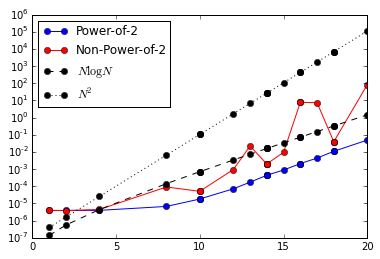

In [6]:
plt.clf()
plt.semilogy(po2s, times, 'o-b',label='Power-of-2')
plt.semilogy(po2s, timesnu, 'o-r',label='Non-Power-of-2')
plt.semilogy(po2s, szs * np.log(szs) * 1e-7, 'o--k',label=r'$N \log{N}$')
plt.semilogy(po2s, szs **2 * 1e-7, 'o:k',label='$N^2$')
plt.legend(loc=0)

In [7]:
#now kill any caffeinate calls to make sure we can sleep
psres = !ps -A | grep "caffeinate -s"
print('\n'.join(psres))

for row in psres:
    if row.split()[3:5] == ['caffeinate', '-s']:
        pid = row.split()[0]
        print('killing pid', pid)
        !kill $pid

55708 ttys009    0:00.01 /bin/sh -c ps -A | grep "caffeinate -s"
55710 ttys009    0:00.00 grep caffeinate -s
55197 ttys011    0:00.01 caffeinate -s
killing pid 55197
